##### Amy McVicar
##### IST 652 Data Scripting
##### Spring 2020

# MovieLens Movie Reviews

## Introduction

    This report will explore a set of movie reviews from the MovieLens small dataset for recommended for education and development projects. MovieLens is a recommendation engine for movies. It and the resulting data sets are curated by GroupLens Research at the University of Minnesota. The work is funded by a grant from the National Science Foundation. 
    
    Thru simple exploratory and comparison analysis this report will determine any trends over time in ratings for movies, select, genres, and reviewers.
    
    What is the popularity of different genre's?
    Has genre popularity changed over time and how?
    Do movie ratings trends change over time?
    Do a reviewers genres and ratings change over time?
  
### Data

    MovieLens offered many different datasets for different uses. The dataset used for this report is a development set recommended for Education and Development and is referred to a as the MovieLens Latest Datasets. It isn't recommended for research or shared results. MovieLens data sets can be found here: https://grouplens.org/datasets/movielens/  A permalink to the data set used can be found here: https://grouplens.org/datasets/movielens/latest/
    
    100,836 ratings and 3,683 tags across 9742 movies is provided in several files: links.csv, movies.csv, ratings.csv and tags.csv. This data was generated on September 26, 2018 by 610 users that reviewed 20 or more movies March 29, 1996 and September 24, 2018, but were otherwise randomly selected. No other information regarding the users is included beyond id.

### Data Preparation

 Both the ratings and movies files were used for this analysis. The movie title originally contained the year it was made as well as additional titles the movie may be known as this. The year was split out into an additional column before upload using MS Excel. In data preparation the timestamp of reviews was converted to date and year. Both files were compiled together. 

In [34]:
# load packages
import os
import csv
import pandas as pd
import pandas_profiling
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import plotnine
import ggplot


ModuleNotFoundError: No module named 'ggplot'

In [3]:
# Change directory to file location
os.chdir(r"C:\Users\amcvicar\OneDrive\School\Syracuse\652 Data Scripting\Project\ml-latest-small")

In [4]:
# Load data
# Ratings FILE
# Specify file to import
infile = 'ratings.csv'
# Read cvs with pandas read_csv
r = pd.read_csv(infile)
# Convert to pandas dataframe
r = pd.DataFrame(r)
# View data
r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Load data
# Movies FILE
# Specify file to import
infile = 'movies_1.csv'
# Read cvs with pandas read_csv
m = pd.read_csv(infile)
# Convert to pandas dataframe
m = pd.DataFrame(m)
# View data
m.head()

,movieId,movie,year,genres
0,122912,Avengers: Infinity War - Part I,2018,Action|Adventure|Sci-Fi
1,182715,Annihilation,2018,Adventure|Mystery|Sci-Fi|Thriller
2,183011,The Commuter,2018,Crime|Drama|Mystery|Thriller
3,183295,Insidious: The Last Key,2018,Horror|Mystery|Thriller
4,183611,Game Night,2018,Action|Comedy|Crime|Horror


In [6]:
# Concatanate Movie & Ratings data
df = r.merge(m, how = 'left', left_on = 'movieId', right_on = 'movieId')

In [7]:
df.head()

,userId,movieId,rating,timestamp,movie,year,genres
0,1,1,4.0,964982703,Toy Story,1995.0,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men,1995.0,Comedy|Romance
2,1,6,4.0,964982224,Heat,1995.0,Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),1995.0,Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The",1995.0,Crime|Mystery|Thriller


In [8]:
# Conver year from float to integer & rename column
df['movie_year'] = np.int64(df['year'])

In [9]:
# Check for nulls
print(df.isnull().values.sum())

54


In [10]:
# Drop rows with nulls
df.dropna(inplace=True)
# Re-check for nulls
print(df.isnull().values.sum())

0


In [11]:
# Basic Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   userId      100818 non-null  int64  
 1   movieId     100818 non-null  int64  
 2   rating      100818 non-null  float64
 3   timestamp   100818 non-null  int64  
 4   movie       100818 non-null  object 
 5   year        100818 non-null  float64
 6   genres      100818 non-null  object 
 7   movie_year  100818 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB
None


In [12]:
# Convert timestamp column to datetime
df['ratings_datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Create rating date & rating year columns
df['ratings_date'] = df['ratings_datetime'].dt.date
df['ratings_year'] = df['ratings_datetime'].dt.year

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            100818 non-null  int64         
 1   movieId           100818 non-null  int64         
 2   rating            100818 non-null  float64       
 3   timestamp         100818 non-null  int64         
 4   movie             100818 non-null  object        
 5   year              100818 non-null  float64       
 6   genres            100818 non-null  object        
 7   movie_year        100818 non-null  int64         
 8   ratings_datetime  100818 non-null  datetime64[ns]
 9   ratings_date      100818 non-null  object        
 10  ratings_year      100818 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 9.2+ MB
None


In [13]:
# Drop unneeded columns
df = df.drop(['year', 'timestamp'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            100818 non-null  int64         
 1   movieId           100818 non-null  int64         
 2   rating            100818 non-null  float64       
 3   movie             100818 non-null  object        
 4   genres            100818 non-null  object        
 5   movie_year        100818 non-null  int64         
 6   ratings_datetime  100818 non-null  datetime64[ns]
 7   ratings_date      100818 non-null  object        
 8   ratings_year      100818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 7.7+ MB
None


In [14]:
df.head()

,userId,movieId,rating,movie,genres,movie_year,ratings_datetime,ratings_date,ratings_year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2000-07-30 18:45:03,2000-07-30,2000
1,1,3,4.0,Grumpier Old Men,Comedy|Romance,1995,2000-07-30 18:20:47,2000-07-30,2000
2,1,6,4.0,Heat,Action|Crime|Thriller,1995,2000-07-30 18:37:04,2000-07-30,2000
3,1,47,5.0,Seven (a.k.a. Se7en),Mystery|Thriller,1995,2000-07-30 19:03:35,2000-07-30,2000
4,1,50,5.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995,2000-07-30 18:48:51,2000-07-30,2000


In [27]:
# Export to Excel
df.to_excel("Movie_Ratings.xlsx") 

## Exploratory Data Analysis



In [15]:
# Check Min and Max make sense
df.describe()

,userId,movieId,rating,movie_year,ratings_year
count,100818.000000,100818.000000,100818.000000,100818.000000,100818.000000
mean,326.128717,19412.910552,3.501532,1994.444990,2007.721191
std,182.620110,35490.816132,1.042469,14.361424,6.889737
min,1.000000,1.000000,0.500000,1902.000000,1996.000000
25%,177.000000,1199.000000,3.000000,1990.000000,2002.000000
50%,325.000000,2991.000000,3.500000,1997.000000,2007.000000
75%,477.000000,8044.000000,4.000000,2003.000000,2015.000000
max,610.000000,193609.000000,5.000000,2018.000000,2018.000000


In [16]:
#profile = df.profile_report(title='MovieLens Profiling Report')
#profile.to_file(output_file="MovieLens_profiling.html")

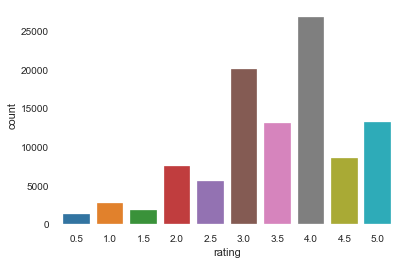

In [17]:
sns.countplot(df['rating'])

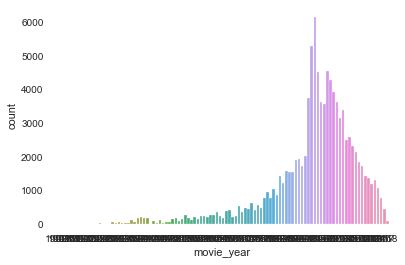

In [18]:
sns.countplot(df['movie_year'])

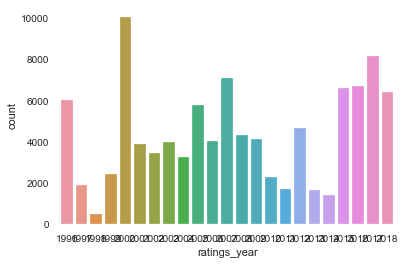

In [19]:
sns.countplot(df['ratings_year'])

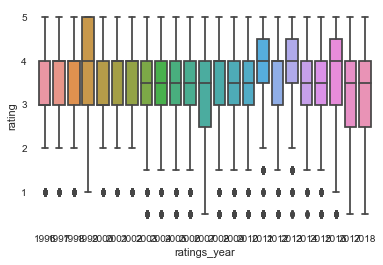

In [20]:
sns.boxplot('ratings_year', 'rating', data=df)

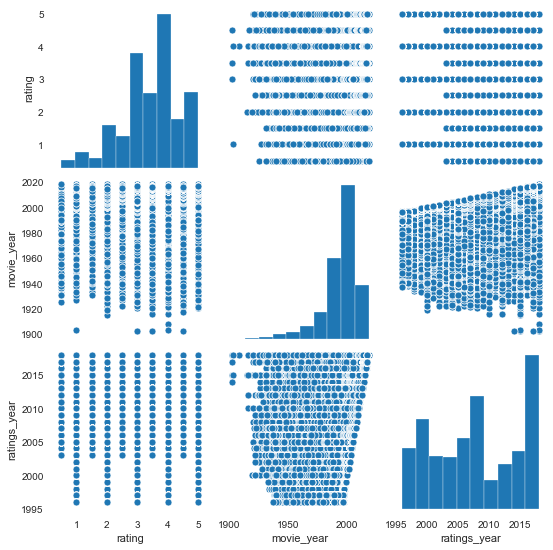

In [21]:
dfx = df.drop(['userId', 'movieId', 'ratings_datetime', 'ratings_date'], axis=1)
sns.pairplot(dfx)

## Results



In [22]:
# Ratings by Year
dfx = dfx = df.drop(['userId', 'movieId', 'movie', 'genres', 'movie_year', 'ratings_datetime', 'ratings_date'], axis=1)
tab_ry = pd.pivot_table(dfx,index=['ratings_year'], columns='rating', aggfunc=np.size, margins=1) 
tab_ry


rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
ratings_year,,,,,,,,,,,
1996,NaN,390.0,NaN,808.0,NaN,5150.0,NaN,3402.0,NaN,2330.0,6040
1997,NaN,60.0,NaN,218.0,NaN,1318.0,NaN,1346.0,NaN,890.0,1916
1998,NaN,96.0,NaN,142.0,NaN,220.0,NaN,336.0,NaN,220.0,507
1999,NaN,224.0,NaN,454.0,NaN,1030.0,NaN,1670.0,NaN,1500.0,2439
2000,NaN,1276.0,NaN,3118.0,NaN,5772.0,NaN,6344.0,NaN,3612.0,10061
2001,NaN,414.0,NaN,960.0,NaN,2200.0,NaN,2734.0,NaN,1536.0,3922
2002,NaN,302.0,NaN,782.0,NaN,1808.0,NaN,2520.0,NaN,1544.0,3478
2003,116.0,174.0,162.0,740.0,400.0,1544.0,986.0,2110.0,730.0,1066.0,4014
2004,56.0,70.0,132.0,342.0,520.0,976.0,1628.0,1678.0,810.0,346.0,3279


In [24]:
# Export to Excel
tab_ry.to_excel("Ratings_by_Year.xlsx") 

In [25]:
# Ratings by Year
dfx = dfx = df.drop(['userId', 'movieId', 'movie', 'movie_year', 'ratings_datetime', 'ratings_date', 'ratings_year'], axis=1)
tab_rg = pd.pivot_table(dfx,index=['genres'], columns='rating', aggfunc=np.size, margins=1) 
tab_rg

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
genres,,,,,,,,,,,
(no genres listed),4.0,2.0,NaN,2.0,12.0,12.0,10.0,12.0,14.0,6.0,37
Action,8.0,26.0,12.0,62.0,26.0,102.0,44.0,54.0,22.0,16.0,186
Action|Adventure,12.0,26.0,22.0,78.0,46.0,136.0,134.0,334.0,90.0,232.0,555
Action|Adventure|Animation,NaN,NaN,NaN,10.0,4.0,14.0,12.0,28.0,10.0,6.0,42
Action|Adventure|Animation|Children,2.0,2.0,2.0,2.0,4.0,16.0,16.0,26.0,4.0,4.0,39
...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller|IMAX,NaN,NaN,NaN,NaN,2.0,2.0,6.0,12.0,2.0,NaN,12
Thriller,14.0,50.0,24.0,90.0,52.0,314.0,140.0,354.0,74.0,144.0,628
War,NaN,NaN,NaN,NaN,NaN,10.0,NaN,6.0,NaN,2.0,9


In [26]:
# Export to Excel
tab_rg.to_excel("Ratings_Counts_by_Genre.xlsx") 

In [3]:
(ggplot(df)
 + aes(x='movie_year', y='ratings_year', size = 'rating', color='rating')
 + geom_point()
 + labs(title='Movie Year & Rating', x='Movie Year', y='Ratings Year')
)

NameError: name 'ggplot' is not defined

## Conclusion

Movies are made to what their markets. In other words, movies seem to be rated only based on their availability and the number of ratings generated are more inline with overall rating activity than shifting genres popularities. If there are genre shifts overtime, it is seen in the data by the movies produced but is not dedectible at the overall level or in this particular datasset.  There aren't any significant trends seen in this data for genres over time. Additionally, the number of stars given stays relatively steady as well.










